In [13]:
# 패키지 참조

import pandas as pd
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
from os import path, mkdir
import folium

In [14]:
# 데이터 불러오기
origin = read_excel("Excel Data/세종시_공원위치.xlsx")
origin.head()

,적재_연월,공원 관리번호,공원_명칭,공원_구분자_정보,공원 위치 도로명주소정보,행정구,위도,경도,공원_면적_정보(㎡ ),공원 보유 시설 중 운동시설,공원 보유 시설 중 유희시설,공원 보유 시설 중 편익시설,공원 보유 시설 중 교양시설,기타 공원 보유 시설,공원 지정일자 정보,공원 관리기관명,공원 관리기관 전화번호,공원 데이터 기준일자
0,202307,36110-00001,부강공원,근린공원,세종특별자치시 부강면 부강3길 20-4,부강면,36.528179,127.363194,16529,게이트볼장,조합놀이대,"의자,파고라,음수대",수상무대섬,"파고라,벤치",1974-10-02,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
1,202307,36110-00002,침산공원(충령탑),근린공원,세종특별자치시 조치원읍 충령고샅길 8,조치원읍,36.598440,127.294907,20681,체력단련시설,조합놀이대,"휴게쉼터,화장실,주차장","경로당,충혼탑및위배봉안실",관리소,1954-05-15,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
2,202307,36110-00003,수원지 공원,근린공원,세종특별자치시 조치원읍 수원지1길 16,조치원읍,36.607255,127.300020,10066,"농구장,체력단련시설",바닥분수,"휴게쉼터,화장실,파고라",청소년 수련관,광장,1989-10-24,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
3,202307,36110-00004,침산공원2,근린공원,세종특별자치시 조치원읍 문예회관길 22,조치원읍,36.599824,127.287845,24402,"농구장,체력단련시설",바닥분수,"의자,파고라",야외무대,연못,1954-05-15,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
4,202307,36110-00013,도담뜰 근린공원(근1-11),근린공원,세종특별자치시 보람로 71,도담동,36.514656,127.262370,18259,체어웨이트,"조합놀이대,흔들놀이그네","파고라,의자",아외무대,"안내판,방향지시판",2007-07-04,시설관리사업소 공원녹지과,044-301-3633,2019-09-06


### Folium으로 시각화

In [15]:
# zoom_start: 배율 1~22 (여기서는 출력 안함)
map_osm=folium.Map(location=[36.4799919, 127.2890511],zoom_start=12)

#마커 클릭시 폰트 색깔 지정
html="<font color='blue' style='white-space:nowrap'><b>%s</b></font>"

#데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in origin.index:
    #행 우선 접근 방식으로 값 추출하기
    name=origin.loc[i,'공원_명칭']
    lat=origin.loc[i,'위도']
    lng=origin.loc[i,'경도']

    #추출한 정보를 지도에 표시
    popup_html=folium.Popup(html%name,parse_html=False)
    marker=folium.Marker([lat,lng],popup=popup_html)
    marker.add_to(map_osm)

    #웹 페이지 파일이 저장될 폴더 생성
    # if not path.exists('output'):
    #     mkdir('output')

    map_osm.save('Folium File/세종시_공원_위치.html') #파일이 저장될 위치

map_osm

In [16]:
#추가된 "구" 컬럼을 이용하여 각 행정구별 공원 수 확인해보기
cdf=DataFrame(origin.filter(['행정구']).value_counts(),columns=['count']).reset_index()
cdf

,행정구,count
0,고운동,16
1,조치원읍,16
2,어진동,11
3,한솔동,9
4,아름동,7
5,도담동,5
6,금남면,2
7,종촌동,2
8,부강면,1
9,연기면,1


> value_counts함수로 확인 결과 공원 수가 가장 많은 곳은 고운동과 조치원읍이 공동1위, 그다음 어진동, 한솔동 순으로 나타난다

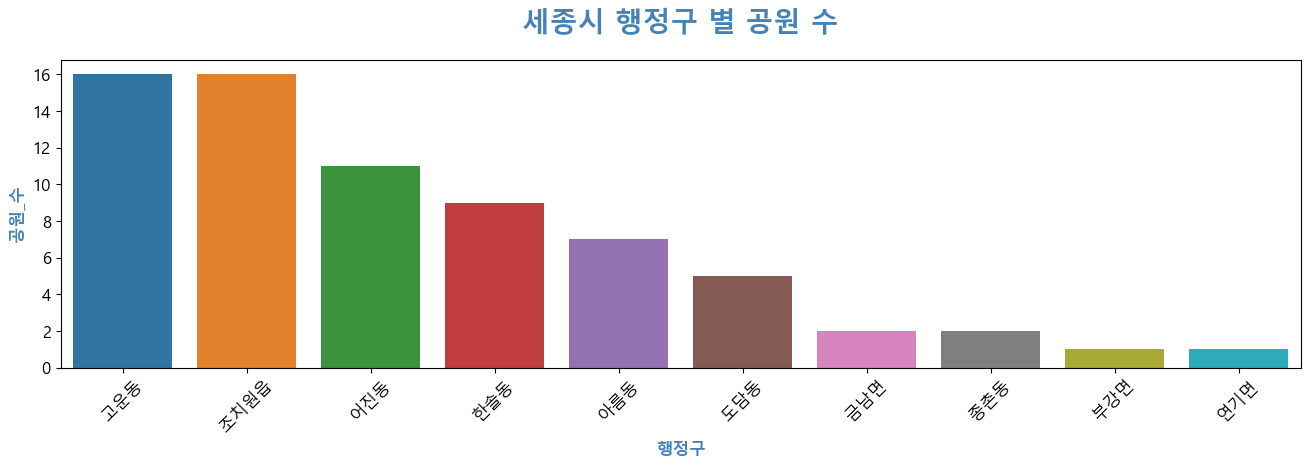

In [17]:
# seaborn 막대그래프 활용하여 시각화 진행
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.unicode_minus"] = False

plt.rcParams["figure.figsize"]=(16,4)
plt.figure()
plt.title("세종시 행정구 별 공원 수",pad=20,color='steelblue',fontsize=20,fontweight='bold')
sb.barplot(data=cdf,x=cdf['행정구'],y=cdf['count'])
plt.xlabel("행정구",color='steelblue',fontweight='bold')
plt.ylabel("공원_수",color='steelblue',fontweight='bold')
plt.xticks(rotation=45) # x축 레이블(텍스트)각도 조절
plt.show()
plt.close()

> 시본 그래프로 확인 결과 단순 공원 갯수가 가장 많은 곳은 고운동,조치원읍,어진동 순으로 나타난다.

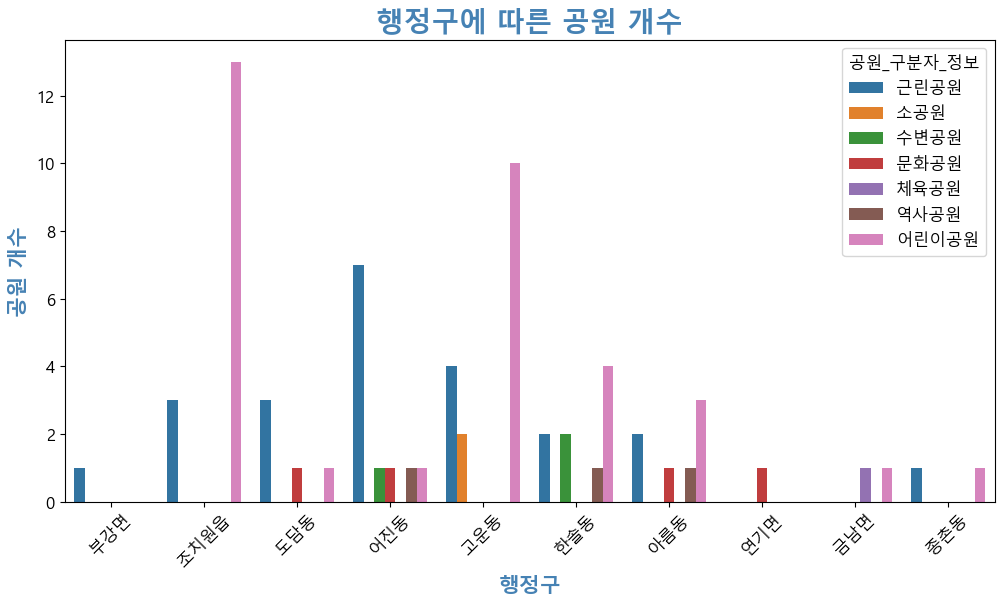

In [18]:
plt.figure(figsize=(12, 6))
sb.countplot(x='행정구', data=origin,hue='공원_구분자_정보')
plt.title('행정구에 따른 공원 개수', color='steelblue', fontsize=20, fontweight='bold')
plt.xlabel('행정구', color='steelblue', fontsize=15, fontweight='bold')
plt.ylabel('공원 개수', color='steelblue', fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

> 카운트플롯으로 공원 종류 카테고리별 확인 결과 단순공원 갯수가 가장 많은 행정구 중 하나인 조치원읍 과 고운동의 경우 어린이공원이 가장 많은 것으로 확인되었다. 

### 세종시 내 공원 면적 top 10 추출

In [19]:
df=origin.copy()
df1=df.sort_values('공원_면적_정보(㎡ )',ascending=False).head(10)
df1

,적재_연월,공원 관리번호,공원_명칭,공원_구분자_정보,공원 위치 도로명주소정보,행정구,위도,경도,공원_면적_정보(㎡ ),공원 보유 시설 중 운동시설,공원 보유 시설 중 유희시설,공원 보유 시설 중 편익시설,공원 보유 시설 중 교양시설,기타 공원 보유 시설,공원 지정일자 정보,공원 관리기관명,공원 관리기관 전화번호,공원 데이터 기준일자
14,202307,36110-00069,호수공원(문화S-1),문화공원,세종특별자치시 연기면 다솜로 216,연기면,36.498818,127.270076,697246,운동기구 16종,"전통그네,물놀이기구,물놀이섬,분수","관리센터,화장실,매점,주차장,샤워실",수상무대섬,"중앙광장,수질정화시설",2010-07-28,시설관리사업소 공원녹지과,044-301-3623,2019-09-06
32,202307,36110-00009,오가낭뜰 근린공원(근1-7),근린공원,세종특별자치시 달빛1로 265,아름동,36.522622,127.248682,617013,"체력단련시설,배드민턴장,풋살장,게이트볼장,인라인장,농구장,인공암벽,파크볼장",조합놀이대,"파고라,평의자앉음벽,관리동,화장실,주차장",아외무대,"자전거보관대,안내판",2007-07-04,시설관리사업소 공원녹지과,044-301-3613,2019-09-06
35,202307,36110-00012,우람뜰 근린공원(근1-10),근린공원,세종특별자치시 절재로 107,도담동,36.507582,127.252786,275971,풀웨이트,조합놀이대,"파고라,의자,밴취",아외무대,안내판,2007-07-04,시설관리사업소 공원녹지과,044-301-3613,2019-09-06
34,202307,36110-00011,기쁨뜰 근린공원(근1-9),근린공원,세종특별자치시 방축1길 45,도담동,36.521251,127.262691,161980,"좌식사이클,배드민턴장",조합놀이대,"파고라,의자,앉음벽",아외무대,"안내판,방향지시판,자전거보관대",2007-07-04,시설관리사업소 공원녹지과,044-301-3613,2019-09-06
29,202307,36110-00022,한솔뜰 근린공원(근2-3),근린공원,세종특별자치시 노을3로 60,한솔동,36.479677,127.257056,87606,"체력단련시설,족구장,배드민턴장",놀이터,"파고라,야외탁자,평의자",아외무대,"연못,실개천,광장",2007-07-04,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
5,202307,36110-00014,두무뜰 근린공원(근1-12),근린공원,세종특별자치시 도움3로 37,어진동,36.503063,127.255928,86108,체력단련시설,"조합놀이대,흔들놀이그네","파고라,의자,앉음벽",아외무대,"자전거보관대,안내판",2007-07-04,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
11,202307,36110-00062,여울목 수변공원(수2-4),수변공원,세종특별자치시 나리로 82,한솔동,36.476240,127.259464,71559,운동기구 9종,"자전거보관대,아내판,정자,탁자,파고라,의자","자전거보관대,평의자,안내판",전망대,안내판,2007-07-04,시설관리사업소 공원녹지과,044-301-3613,NaT
33,202307,36110-00010,두루뜰 근린공원(근1-8),근린공원,세종특별자치시 바른6길 27,아름동,36.518985,127.247143,62434,체련단련시설,조합놀이대,"파고라,평상,의자",아외무대,"안내판,보행데크",2007-07-04,시설관리사업소 공원녹지과,044-301-3613,2019-09-06
30,202307,36110-00023,아침뜰 근린공원(근2-4),근린공원,세종특별자치시 누리로 119,한솔동,36.480047,127.250889,59026,"체력단련시설,족구장,배드민턴장",놀이터,"아외무대,파고라,관린사무소",아외무대,계류 및 분수,2007-07-04,시설관리사업소 공원녹지과,044-301-3633,2019-09-06
37,202307,36110-00018,맑은뜰 근린공원(근1-16),근린공원,세종특별자치시 가름로 170-17,어진동,36.496979,127.259015,56617,"배드민턴,체력단련시설","조합놀이대,흔들놀이그네","파고라,의자,앉음벽",아외무대,"안내판,자전거보관대",2007-07-04,시설관리사업소 공원녹지과,044-301-3633,2019-09-06


> 면적순으로 sort해서 조회 결과 가장 세종시에서 큰 공원은 다음과 같다.

-- 1. 세종시 호수공원 -> 2. 오가낭뜰 근린공원 -> 3. 우람뜰 근린공원 -> 4. 기쁨뜰 근린공원

-- 5. 한솔뜰 근린공원 -> 6. 두무뜰 근린공원 -> 7. 여울목 수변공원 -> 8. 두루뜰 근린공원 

-- 9. 아침뜰 근린공원 -> 10. 맑은뜰 근린공원

해당 공원들은 세종시 내에서 부지가 큰 공원들로 관광지 역할 및 세종시민들이 주로 이용하는 공원일 확률이 매우 높다.

In [20]:
# zoom_start: 배율 1~22 (여기서는 출력 안함)
map_osm=folium.Map(location=[36.4799919, 127.2890511],zoom_start=12)

#마커 클릭시 폰트 색깔 지정
html="<font color='blue' style='white-space:nowrap'><b>%s</b></font>"

#데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in df1.index:
    #행 우선 접근 방식으로 값 추출하기
    name=df1.loc[i,'공원_명칭']
    lat=df1.loc[i,'위도']
    lng=df1.loc[i,'경도']

    #추출한 정보를 지도에 표시
    popup_html=folium.Popup(html%name,parse_html=False)
    marker=folium.Marker([lat,lng],popup=popup_html)
    marker.add_to(map_osm)

    #웹 페이지 파일이 저장될 폴더 생성
    # if not path.exists('output'):
    #     mkdir('output')

    map_osm.save('Folium File/세종시_공원면적_top10.html') #파일이 저장될 위치

map_osm

> 해당 공원 지역을 참고하여 추후 세종시에서 진행할 무인자율 모빌리티 동선을 참고하면 좋을것이다.